In [1]:
import pandas as pd
data = pd.read_csv('/Users/chenxingchun/Kaggle/Superstore.csv', encoding='ISO-8859-1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [34]:
data.shape

(9994, 21)

In [2]:
from datetime import datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d-%m-%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%d-%m-%Y')
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data['Order Date'].max()

Timestamp('2014-12-31 00:00:00')

In [4]:
day = '2015-01-01'
day = pd.to_datetime(day)

In [5]:
recency = data.groupby('Customer ID').agg(days=('Order Date',lambda x : (day-x.max()).days))
recency

,days
Customer ID,
AA-10315,185
AA-10375,20
AA-10480,260
AA-10645,56
AB-10015,416
...,...
XP-21865,44
YC-21895,5
YS-21880,10


In [6]:
frequency = data.groupby('Customer ID').agg(counts=('Order ID','count'))
frequency

,counts
Customer ID,
AA-10315,11
AA-10375,15
AA-10480,12
AA-10645,18
AB-10015,6
...,...
XP-21865,28
YC-21895,8
YS-21880,12


In [7]:
monetary = data.groupby('Customer ID').agg(total=('Sales','sum'))
monetary

,total
Customer ID,
AA-10315,5563.560
AA-10375,1056.390
AA-10480,1790.512
AA-10645,5086.935
AB-10015,886.156
...,...
XP-21865,2374.658
YC-21895,5454.350
YS-21880,6720.444


In [8]:
data_RFM = pd.concat([recency, frequency, monetary], axis = 1)
copy_RFM = data_RFM.copy()
copy_RFM

,days,counts,total
Customer ID,,,
AA-10315,185,11,5563.560
AA-10375,20,15,1056.390
AA-10480,260,12,1790.512
AA-10645,56,18,5086.935
AB-10015,416,6,886.156
...,...,...,...
XP-21865,44,28,2374.658
YC-21895,5,8,5454.350
YS-21880,10,12,6720.444


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
Scaled_copy_RFM = scaler.fit_transform(copy_RFM)

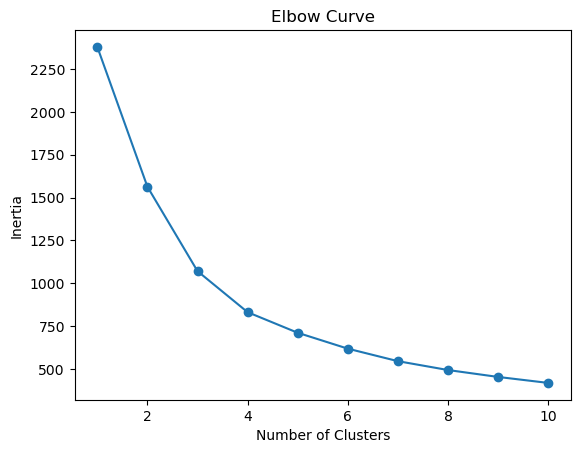

In [10]:
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Scaled_copy_RFM)
    inertia.append(kmeans.inertia_)
    
# Plotting the Elbow Curve to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1,11), inertia, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

In [11]:
ideal_k = 3
kmeans = KMeans(n_clusters = ideal_k)
kmeans.fit(Scaled_copy_RFM)
copy_RFM['Cluster'] = (kmeans.labels_ +1)
copy_RFM

,days,counts,total,Cluster
Customer ID,,,,
AA-10315,185,11,5563.560,2
AA-10375,20,15,1056.390,2
AA-10480,260,12,1790.512,2
AA-10645,56,18,5086.935,1
AB-10015,416,6,886.156,3
...,...,...,...,...
XP-21865,44,28,2374.658,1
YC-21895,5,8,5454.350,2
YS-21880,10,12,6720.444,1


In [18]:
copy_RFM.groupby('Cluster')['days','counts','total'].mean()

/var/folders/pm/t7xh08q53hvbcx0zynj45_wr0000gn/T/ipykernel_1394/3355866270.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  copy_RFM.groupby('Cluster')['days','counts','total'].mean()


,days,counts,total
Cluster,,,
1,79.842342,19.788288,5613.858615
2,88.084599,10.308026,1895.012864
3,535.254545,7.718182,1612.030161


In [13]:
def func(row):
    if row['Cluster'] == 1:
        return 'High'
    elif row['Cluster'] == 2:
        return 'Medium'
    else:
        return 'Low'

In [14]:
copy_RFM['Group'] = copy_RFM.apply(func, axis = 1)
copy_RFM

,days,counts,total,Cluster,Group
Customer ID,,,,,
AA-10315,185,11,5563.560,2,Medium
AA-10375,20,15,1056.390,2,Medium
AA-10480,260,12,1790.512,2,Medium
AA-10645,56,18,5086.935,1,High
AB-10015,416,6,886.156,3,Low
...,...,...,...,...,...
XP-21865,44,28,2374.658,1,High
YC-21895,5,8,5454.350,2,Medium
YS-21880,10,12,6720.444,1,High


In [25]:
result = copy_RFM['Group'].value_counts()
result

Medium    461
High      222
Low       110
Name: Group, dtype: int64

In [20]:
import plotly.express as px
import seaborn as sns

In [29]:
df = pd.DataFrame({'Group': result.index, 'count': result.values})
fig = px.pie(df, names = 'Group', values = 'count', title = 'Customer Segmentation',
             color_discrete_sequence = px.colors.sequential.Reds,
             width = 500, height = 500 )
fig.update_traces(textposition='inside',textinfo='label+percent')
fig.show()

In [32]:
new_data = data.merge(copy_RFM['Group'], how = 'right', left_on='Customer ID', right_on='Customer ID')
new_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Group
0,1160,CA-2014-147039,2014-06-30,2014-07-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,Minneapolis,...,Central,OFF-AP-10000576,Office Supplies,Appliances,"Belkin 325VA UPS Surge Protector, 6'",362.940,3,0.0,90.7350,Medium
1,1161,CA-2014-147039,2014-06-30,2014-07-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,Minneapolis,...,Central,OFF-BI-10004654,Office Supplies,Binders,Avery Binding System Hidden Tab Executive Styl...,11.540,2,0.0,5.7700,Medium
2,1300,CA-2012-121391,2012-10-04,2012-10-07,First Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,West,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2,0.0,7.0096,Medium
3,2230,CA-2011-128055,2011-03-31,2011-04-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,West,OFF-BI-10004390,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2,0.2,252.5880,Medium
4,2231,CA-2011-128055,2011-03-31,2011-04-05,Standard Class,AA-10315,Alex Avila,Consumer,United States,San Francisco,...,West,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2,0.0,14.8344,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,3815,CA-2013-152471,2013-07-09,2013-07-09,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,TEC-PH-10002824,Technology,Phones,Jabra SPEAK 410 Multidevice Speakerphone,823.960,5,0.2,51.4975,Medium
9990,3816,CA-2013-152471,2013-07-09,2013-07-09,Same Day,ZD-21925,Zuschuss Donatelli,Consumer,United States,Jacksonville,...,South,OFF-PA-10004965,Office Supplies,Paper,Xerox 1921,15.984,2,0.2,4.9950,Medium
9991,5898,CA-2013-167682,2013-04-04,2013-04-10,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,Central,FUR-FU-10003799,Furniture,Furnishings,"Seth Thomas 13 1/2"" Wall Clock",71.120,4,0.0,22.0472,Medium
9992,5899,CA-2013-167682,2013-04-04,2013-04-10,Standard Class,ZD-21925,Zuschuss Donatelli,Consumer,United States,Richmond,...,Central,TEC-PH-10000673,Technology,Phones,Plantronics Voyager Pro HD - Bluetooth Headset,259.960,4,0.0,124.7808,Medium


In [37]:
new_data.to_csv('superstore_RFM.csv', index=False)